In [1]:
import pandas as pd
import re
import string
from colorama import Fore
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [2]:
#HotpotQa paper_content from S2orc
df=pd.read_csv('all_paper_content.csv',index_col=0)

In [3]:
#Get offset of text
def get_offset(dict,i):
    start=dic[i]['start']
    end=dic[i]['end']
    return start,end

In [4]:
#Extract text of paper-title by using annotation and offset  
title_list=[]
for i in range(len(df)):
    a=eval(df['content'][i])
    if a['annotations']['title']==None:
        title_list.append('None')
    else:
        dic=eval(a['annotations']['title'])
        start,end = get_offset(dic,0)
        title_list.append(a['text'][start:end])

In [5]:
# Insert paper-title column
df.insert(1,'title',title_list)
df

,corpusid,title,externalids,content,updated,ref_paper_id,cite_text
0,263908862,Idea2Img: Iterative Self-Refinement with GPT-4...,"{'arxiv': '2310.08541', 'mag': None, 'acl': No...",{'source': {'pdfurls': ['https://export.arxiv....,NaN,{},{}
1,248665596,From Distillation to Hard Negative Sampling: M...,"{'arxiv': None, 'mag': None, 'acl': None, 'pub...",{'source': {'pdfurls': ['https://arxiv.org/pdf...,NaN,{220302524: '[30]'},{220302524: '\n\n\nResults and discussion\n\nW...
2,6729528,ACO Implementation for Sequence Alignment with...,"{'arxiv': '1406.0930', 'mag': '2296706549', 'a...",{'source': {'pdfurls': ['https://arxiv.org/pdf...,NaN,{},{}
3,264490922,What Else Do I Need to Know? The Effect of Bac...,"{'arxiv': None, 'mag': None, 'acl': None, 'pub...",{'source': {'pdfurls': ['https://export.arxiv....,NaN,"{123758373: 'Chen and Durrett, 2019;', 2466523...","{123758373: ', 2019;', 246652372: ', 2023), la..."
4,14155615,Supplemental Material to,"{'arxiv': None, 'mag': '2065435633', 'acl': No...","{'source': {'pdfurls': None, 'pdfsha': '8cd7af...",NaN,NaN,NaN
...,...,...,...,...,...,...,...
1534,236459873,Explanations for CommonsenseQA: New Dataset an...,"{'arxiv': None, 'mag': None, 'acl': '2021.acl-...",{'source': {'pdfurls': ['https://aclanthology....,NaN,"{218487313: 'Yadav et al., 2020', 52822214: 'Y...","{218487313: '\n\nAIR ', 52822214: ', 2017;'}"
1535,2724512,Phylogenetic Comparison of F-Box (FBX) Gene Su...,"{'arxiv': None, 'mag': '2021858754', 'acl': No...","{'source': {'pdfurls': None, 'pdfsha': 'fb186d...",NaN,{9060527: '[41]'},"{9060527: ' remanei, which were estimated to h..."
1536,202565945,Self-Assembling Modular Networks for Interpret...,"{'arxiv': '1909.05803', 'mag': '2972378157', '...",{'source': {'pdfurls': ['https://www.aclweb.or...,NaN,"{139103297: 'Chen and Durrett, 2019;', 1899278...",{139103297: '\n\n\nAdversarial Evaluation\n\nM...
1537,248476403,Inferring Implicit Relations with Language Models,"{'arxiv': None, 'mag': None, 'acl': None, 'pub...",{'source': {'pdfurls': ['https://arxiv.org/pdf...,NaN,"{230799347: 'Geva et al., 2021', 225075843: 'L...",{230799347: '\n\n\nData Collection\n\nWe curat...


In [6]:
#Extract text from Section 'limitation','Disscussion','Conclusion'
columns = ['corpusid','paper-title','section-title','Target','Content','ref_paper_id','pdfurl']
d_sec=pd.DataFrame(columns=columns)

strings=''
for i in range(len(df)):
    a=eval(df['content'][i])
    position=[]
    text_end=len(a['text'])-1

    #URL
    try:
        url=a['source']['pdfurls'][0]
    except:
        url='NaN'
    
    #section
    try:
        dic=eval(a['annotations']['sectionheader'])
    except:
        continue

    for j in range(len(dic)):
        if 'attributes' not in list(dic[j].keys()): # section_num strings in section
            continue
        
        start,end = get_offset(dic,j)
        try:
            start_next,end_next=get_offset(dic,j+1)
        except:
            print('bottom')
        # print('start:',start)
        sec_num=dic[j]['attributes']['n']
        section_title = a['text'][start:end].lower()
            
        if 'disscuss' in section_title and 'conclusion' not in section_title:
            Total=a['text'][end:start_next].lower()

            print(Fore.GREEN +'disscussion:',Total.replace('\n',''))
            strings=Total.replace('\n','')
            # add-data
            d_sec_append=pd.DataFrame(data=[[df['corpusid'][i],df['title'][i],section_title,'Insight-tree',strings,df['ref_paper_id'][i],url]], columns=columns)
            d_sec=pd.concat([d_sec, d_sec_append], ignore_index=True, axis=0)

        if 'limitation' in section_title and 'conclusion' not in section_title:
            Total=a['text'][end:start_next].lower()

            print(Fore.GREEN +'limitation:',Total.replace('\n',''))
            strings=Total.replace('\n','')
            # add-data
            d_sec_append=pd.DataFrame(data=[[df['corpusid'][i],df['title'][i],section_title,'Insight-tree',strings,df['ref_paper_id'][i],url]], columns=columns)
            d_sec=pd.concat([d_sec, d_sec_append], ignore_index=True, axis=0)

        
        if 'conclusion' in section_title:
            for p in range(len(eval(a['annotations']['paragraph']))):
                ref_flag=eval(a['annotations']['paragraph'])[p]['end']
                if ref_flag > end:
                    break
            
            Total=a['text'][end:ref_flag].lower()

            print(Fore.GREEN +'conclusion:',Total.replace('\n',''))
            strings=Total.replace('\n','')
            # add-data
            d_sec_append=pd.DataFrame(data=[[df['corpusid'][i],df['title'][i],section_title,'Insight-tree',strings,df['ref_paper_id'][i],url]], columns=columns)
            d_sec=pd.concat([d_sec, d_sec_append], ignore_index=True, axis=0)
        
        print(Fore.MAGENTA + 'Section_title:',sec_num + ' ',a['text'][start:end])
        end_pos=end
        position.append(end_pos)
        
    print('\n')
    print('#########')

Section_title: 1.  Introduction
Section_title: 2.  Related Work
Section_title: 3.  Idea2Img Framework
Section_title: 4.  Experiments
Section_title: 4.1.  Experiment Settings
Section_title: 4.2.  Image Generation Results
Section_title: 4.3.  LMM Feedback, Revision, and Selection
limitation: tasks beyond image generation. idea2img explores the emergent ability of multimodal self-refinement in lmmbased systems, through the image design and generation task. specifically, idea2img views the t2i model to use as an unknown multimodal environment to explore, and iteratively refines t2i prompts to find its optimal usage. this concept mirrors the intrinsic human approach of iterative problem-solving when faced with unknown environments or complex challenges. we leave its extension to other intriguing tasks [48], e.g., gui navigation, embodied agents, and complicated visual reasoning, for future exploration. from a single image generation model to multiple tools. idea2img explores the usage of a 

In [7]:
d_sec

,corpusid,paper-title,section-title,Target,Content,ref_paper_id,pdfurl
0,263908862,Idea2Img: Iterative Self-Refinement with GPT-4...,limitation and discussion,Insight-tree,tasks beyond image generation. idea2img explor...,{},https://export.arxiv.org/pdf/2310.08541v1.pdf
1,263908862,Idea2Img: Iterative Self-Refinement with GPT-4...,conclusion,Insight-tree,"we have presented idea2img, a multimodal itera...",{},https://export.arxiv.org/pdf/2310.08541v1.pdf
2,248665596,From Distillation to Hard Negative Sampling: M...,conclusion,Insight-tree,"in this paper, we have built on the splade mod...",{220302524: '[30]'},https://arxiv.org/pdf/2205.04733v2.pdf
3,264490922,What Else Do I Need to Know? The Effect of Bac...,discussion and conclusion,Insight-tree,"large general-purpose language models, such as...","{123758373: 'Chen and Durrett, 2019;', 2466523...",https://export.arxiv.org/pdf/2305.14331v2.pdf
4,253098647,Learning to Perform Complex Tasks through Comp...,conclusion & future work,Insight-tree,"in this work, we proposed cft as an improvemen...","{204915921: 'Khot et al., 2020;', 248666080: '...",https://export.arxiv.org/pdf/2210.12607v1.pdf
...,...,...,...,...,...,...,...
1176,252819325,CMQA: A Dataset of Conditional Question Answer...,conclusion,Insight-tree,"in this paper, we propose a new challenge: con...","{215785913: 'Chen et al., 2020', 67855846: 'Du...",https://www.aclanthology.org/2022.coling-1.146...
1177,249049412,Examining Single Sentence Label Leakage in Nat...,conclusion,Insight-tree,"in the four years since (poliak et al., 2018) ...",{},https://arxiv.org/pdf/2112.09237v3.pdf
1178,236459873,Explanations for CommonsenseQA: New Dataset an...,conclusion and future work,Insight-tree,we have presented desiderata of what constitut...,"{218487313: 'Yadav et al., 2020', 52822214: 'Y...",https://aclanthology.org/2021.acl-long.238.pdf
1179,202565945,Self-Assembling Modular Networks for Interpret...,conclusion,Insight-tree,"in this work, we proposed a self-assembling ne...","{139103297: 'Chen and Durrett, 2019;', 1899278...",https://www.aclweb.org/anthology/D19-1455.pdf


In [8]:
Insight_dataset=d_sec[d_sec['Target']=='Insight-tree']
Insight_dataset

,corpusid,paper-title,section-title,Target,Content,ref_paper_id,pdfurl
0,263908862,Idea2Img: Iterative Self-Refinement with GPT-4...,limitation and discussion,Insight-tree,tasks beyond image generation. idea2img explor...,{},https://export.arxiv.org/pdf/2310.08541v1.pdf
1,263908862,Idea2Img: Iterative Self-Refinement with GPT-4...,conclusion,Insight-tree,"we have presented idea2img, a multimodal itera...",{},https://export.arxiv.org/pdf/2310.08541v1.pdf
2,248665596,From Distillation to Hard Negative Sampling: M...,conclusion,Insight-tree,"in this paper, we have built on the splade mod...",{220302524: '[30]'},https://arxiv.org/pdf/2205.04733v2.pdf
3,264490922,What Else Do I Need to Know? The Effect of Bac...,discussion and conclusion,Insight-tree,"large general-purpose language models, such as...","{123758373: 'Chen and Durrett, 2019;', 2466523...",https://export.arxiv.org/pdf/2305.14331v2.pdf
4,253098647,Learning to Perform Complex Tasks through Comp...,conclusion & future work,Insight-tree,"in this work, we proposed cft as an improvemen...","{204915921: 'Khot et al., 2020;', 248666080: '...",https://export.arxiv.org/pdf/2210.12607v1.pdf
...,...,...,...,...,...,...,...
1176,252819325,CMQA: A Dataset of Conditional Question Answer...,conclusion,Insight-tree,"in this paper, we propose a new challenge: con...","{215785913: 'Chen et al., 2020', 67855846: 'Du...",https://www.aclanthology.org/2022.coling-1.146...
1177,249049412,Examining Single Sentence Label Leakage in Nat...,conclusion,Insight-tree,"in the four years since (poliak et al., 2018) ...",{},https://arxiv.org/pdf/2112.09237v3.pdf
1178,236459873,Explanations for CommonsenseQA: New Dataset an...,conclusion and future work,Insight-tree,we have presented desiderata of what constitut...,"{218487313: 'Yadav et al., 2020', 52822214: 'Y...",https://aclanthology.org/2021.acl-long.238.pdf
1179,202565945,Self-Assembling Modular Networks for Interpret...,conclusion,Insight-tree,"in this work, we proposed a self-assembling ne...","{139103297: 'Chen and Durrett, 2019;', 1899278...",https://www.aclweb.org/anthology/D19-1455.pdf


In [9]:
Insight_dataset.insert(7,'Solved','None')
Insight_dataset.insert(8,'Unsolved/FW','None')
Insight_dataset=Insight_dataset.reset_index(drop=True)

In [10]:
#Delete rows with lack of information
emp=[]
for i in range(len(Insight_dataset)):
    text=Insight_dataset['Content'][i]
    if len(text)<=10:
        emp.append(i)

Insight_dataset.drop(index=emp, inplace=True)

Insight_dataset=Insight_dataset.reset_index(drop=True)

In [11]:
#Drop_duplicates
Insight_dataset=Insight_dataset.drop_duplicates("Content")
Insight_dataset=Insight_dataset.reset_index(drop=True)

In [12]:
Insight_dataset.to_csv('Insight_dataset.csv')

# Frequently Used Words - Insight Section(Limitation, Disscussion, Conclusion), Paper-title

## Insight Section

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [14]:
strings=''
for i in range(len(Insight_dataset)):
    a=Insight_dataset['Content'][i]
    strings=strings+' '+a

In [15]:
def Tokenizer(strings):
    #lower & clean punctuation
    strings=strings.lower()
    strings=strings.translate(str.maketrans('', '', string.punctuation))

    #Stopwords
    token=nltk.word_tokenize(strings)
    stop_words = stopwords.words('english')
    tokens=[]
    for i in range(len(token)):
        if token[i] not in stop_words:
            tokens.append(token[i])  

    #clean tokens
    lemmatizer = WordNetLemmatizer()
    filter_word=['introduction','conclusion','evaluation','figure','table','survey','et','al','research','we','use','work','issue','also','future','however','finally','task','paper','nlp','natural','language','processing','international','conference','meeting','annual','method','example','arxiv']
    clean_token=[]
    for item in tokens:
        item=lemmatizer.lemmatize(item, pos="n")
        if item not in filter_word and re.search(r'^\d+$',item) is None:
            clean_token.append(item)
    
    return clean_token


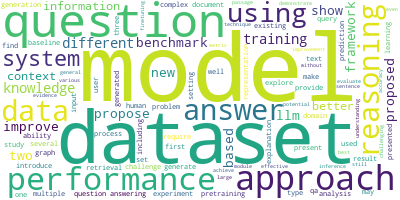

In [16]:
clean_token=Tokenizer(strings)
#wordcloud
long_string = ','.join(clean_token)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [17]:
#count
freq_dist = nltk.FreqDist(clean_token)
freq_dist.most_common()

[('model', 1840),
 ('question', 981),
 ('reasoning', 686),
 ('performance', 573),
 ('qa', 473),
 ('approach', 432),
 ('data', 431),
 ('dataset', 415),
 ('knowledge', 413),
 ('answer', 407),
 ('result', 402),
 ('show', 392),
 ('datasets', 391),
 ('system', 383),
 ('retrieval', 381),
 ('training', 344),
 ('proposed', 302),
 ('different', 301),
 ('benchmark', 285),
 ('new', 284),
 ('experiment', 283),
 ('learning', 280),
 ('using', 277),
 ('propose', 274),
 ('information', 254),
 ('multihop', 248),
 ('two', 237),
 ('document', 232),
 ('answering', 231),
 ('better', 222),
 ('llm', 221),
 ('large', 214),
 ('study', 213),
 ('context', 213),
 ('framework', 211),
 ('human', 204),
 ('generation', 197),
 ('baseline', 195),
 ('based', 195),
 ('text', 194),
 ('graph', 192),
 ('stateoftheart', 185),
 ('set', 185),
 ('query', 184),
 ('improve', 182),
 ('existing', 181),
 ('domain', 180),
 ('may', 179),
 ('present', 177),
 ('analysis', 175),
 ('problem', 175),
 ('novel', 174),
 ('first', 169),
 ('com

## Paper-title

In [18]:
strings=''
for i in range(len(Insight_dataset)):
    a=Insight_dataset['paper-title'][i]
    strings=strings+' '+a

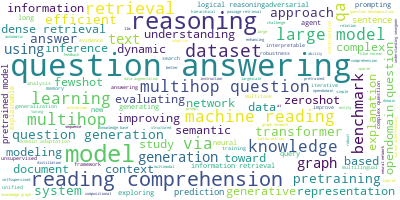

In [19]:
clean_token=Tokenizer(strings)
#wordcloud
long_string = ','.join(clean_token)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [20]:
#count
freq_dist = nltk.FreqDist(clean_token)
freq_dist.most_common()

[('question', 367),
 ('answering', 260),
 ('model', 195),
 ('reasoning', 164),
 ('retrieval', 120),
 ('multihop', 108),
 ('comprehension', 101),
 ('reading', 99),
 ('learning', 73),
 ('generation', 71),
 ('knowledge', 70),
 ('dataset', 65),
 ('large', 58),
 ('graph', 55),
 ('via', 54),
 ('machine', 52),
 ('qa', 48),
 ('data', 47),
 ('text', 47),
 ('information', 42),
 ('benchmark', 42),
 ('understanding', 39),
 ('dense', 39),
 ('network', 38),
 ('domain', 37),
 ('complex', 36),
 ('using', 36),
 ('pretraining', 33),
 ('opendomain', 32),
 ('neural', 31),
 ('transformer', 31),
 ('answer', 31),
 ('system', 30),
 ('document', 30),
 ('approach', 29),
 ('efficient', 29),
 ('pretrained', 27),
 ('improving', 26),
 ('fewshot', 26),
 ('representation', 25),
 ('towards', 24),
 ('long', 24),
 ('zeroshot', 24),
 ('adaptation', 23),
 ('evaluating', 23),
 ('explanation', 23),
 ('based', 23),
 ('generative', 23),
 ('query', 23),
 ('multitask', 21),
 ('semantic', 21),
 ('unsupervised', 20),
 ('contrasti